In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
datos = pd.read_csv('Datos/google-play-store-apps/googleplaystore.csv', sep=',')

In [3]:
df = pd.DataFrame(datos)

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
df[df['Reviews']=='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [7]:
df.drop(df[df['Reviews'] =='3.0M'].index, inplace=True)

In [8]:
df[df['Reviews']=='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [9]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [10]:
df[['Reviews']] = df[['Reviews']].astype(int)

In [11]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [12]:
df['Size'] = df['Size'].str.replace('M', '')

In [13]:
### Esto esta mal, no encuentro como eliminar estos valores, averiguar (o mejor pasar a 0.valor actual ya que estan en bytes)
### posible funcion
### def  get_(size):
### #2**10 = 1024
### power = 2**10
### n = 0
### Dic_powerN = {0 : '', 1: 'kilo', 2: 'mega', 3: 'giga', 4: 'tera'}
### while size > power:
### size /=  power
###  n += 1
### return size, Dic_powerN[n]+'bytes'
df['Size'] = df['Size'].str.replace('k', '')

In [14]:
df.drop(df[df['Size'] =='Varies with device'].index, inplace=True)

In [15]:
df.reset_index(drop=True, inplace=True)

In [16]:
df['Size'] = df['Size'].astype('float64') 

In [17]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [18]:
alto = df.loc[0, 'Reviews']

In [19]:
for i in range(0, len(df)):
    df.loc[i, 'Size bytes'] = df.loc[i, 'Size'] * 1024

In [20]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size bytes
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2867.2


In [21]:
df.shape

(9145, 14)

In [22]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Size bytes'],
      dtype='object')

In [23]:
df.rename(columns={'Category' : 'Categoria', 'Rating' : 'Puntaje', 
                   'Size' : 'Peso', 'Installs' : 'Instalaciones', 
                   'Type': 'Tipo', 'Price' : 'Precio', 'Content Rating' : 'Contenido',
                   'Genres' : 'Genero', 'Last Updated' : 'Actualizacion', 
                   'Current Ver' : 'Version', 'Android Ver' : 'VersionAndroid', 'Size bytes' : 'Peso_Bytes'}, inplace=True)

In [24]:
df.columns

Index(['App', 'Categoria', 'Puntaje', 'Reviews', 'Peso', 'Instalaciones',
       'Tipo', 'Precio', 'Contenido', 'Genero', 'Actualizacion', 'Version',
       'VersionAndroid', 'Peso_Bytes'],
      dtype='object')

In [25]:
df.head(3)

,App,Categoria,Puntaje,Reviews,Peso,Instalaciones,Tipo,Precio,Contenido,Genero,Actualizacion,Version,VersionAndroid,Peso_Bytes
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8908.8


In [26]:
df.isnull().any().any()

True

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9145 entries, 0 to 9144
Data columns (total 14 columns):
App               9145 non-null object
Categoria         9145 non-null object
Puntaje           7729 non-null float64
Reviews           9145 non-null int32
Peso              9145 non-null float64
Instalaciones     9145 non-null object
Tipo              9145 non-null object
Precio            9145 non-null object
Contenido         9145 non-null object
Genero            9145 non-null object
Actualizacion     9145 non-null object
Version           9137 non-null object
VersionAndroid    9143 non-null object
Peso_Bytes        9145 non-null float64
dtypes: float64(3), int32(1), object(10)
memory usage: 964.6+ KB


In [28]:
df.count()

App               9145
Categoria         9145
Puntaje           7729
Reviews           9145
Peso              9145
Instalaciones     9145
Tipo              9145
Precio            9145
Contenido         9145
Genero            9145
Actualizacion     9145
Version           9137
VersionAndroid    9143
Peso_Bytes        9145
dtype: int64

In [29]:
df.dtypes

App                object
Categoria          object
Puntaje           float64
Reviews             int32
Peso              float64
Instalaciones      object
Tipo               object
Precio             object
Contenido          object
Genero             object
Actualizacion      object
Version            object
VersionAndroid     object
Peso_Bytes        float64
dtype: object

In [30]:
def generalCountPlot(x=None, data=None, pattel='autumn'):
    plt.figure(figsize=(12,7))
    plt.xticks(rotation=90)
    sns.countplot(x=x, data=data, palette=pattel)

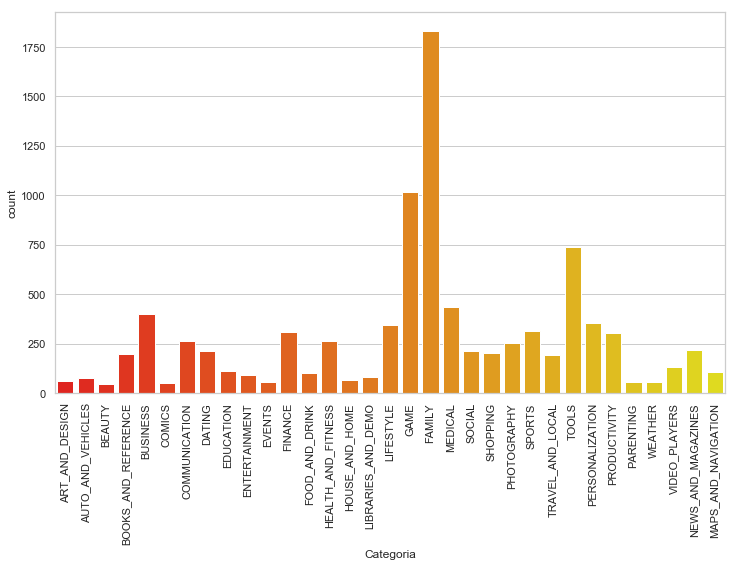

In [31]:
generalCountPlot('Categoria', df)

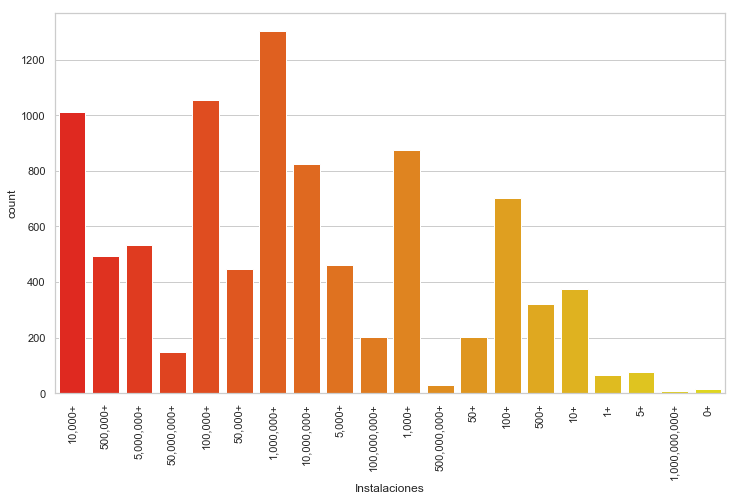

In [32]:
generalCountPlot('Instalaciones', df)

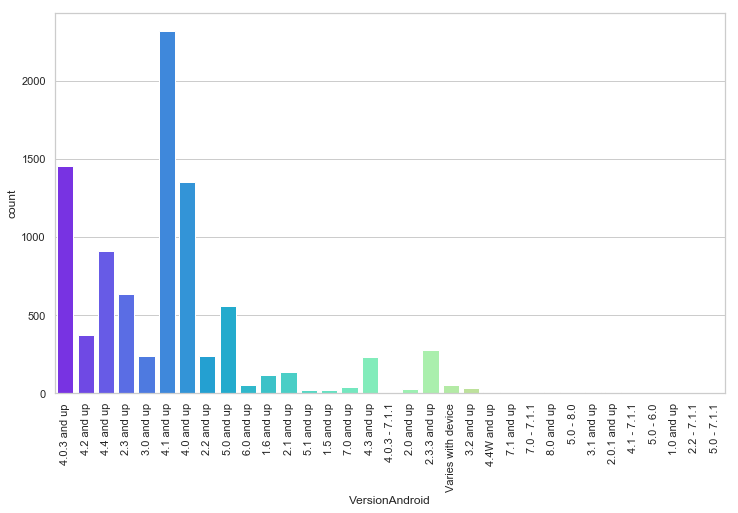

In [33]:
generalCountPlot('VersionAndroid', df, 'rainbow')

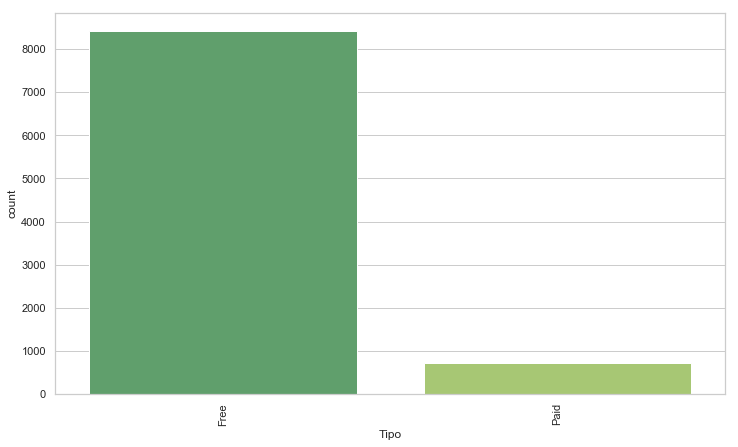

In [34]:
generalCountPlot('Tipo', df, 'summer')

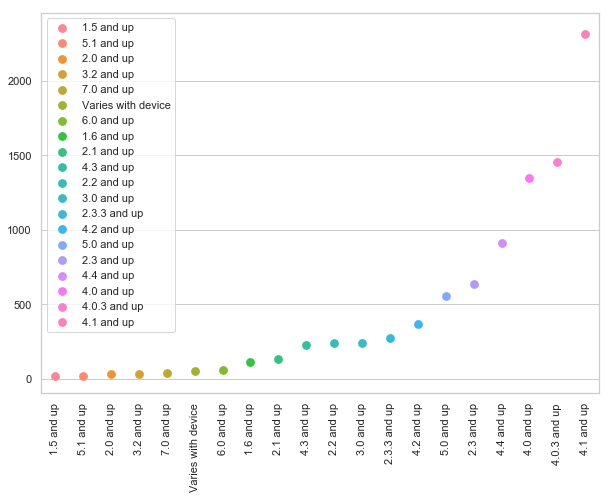

In [35]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
temp_value = df.VersionAndroid.value_counts().sort_values(ascending=True)[-20:]
sns.pointplot(x=temp_value.index, y=temp_value.values, hue=temp_value.index, estimator=np.sum, orient="v")

In [36]:
df.dtypes

App                object
Categoria          object
Puntaje           float64
Reviews             int32
Peso              float64
Instalaciones      object
Tipo               object
Precio             object
Contenido          object
Genero             object
Actualizacion      object
Version            object
VersionAndroid     object
Peso_Bytes        float64
dtype: object

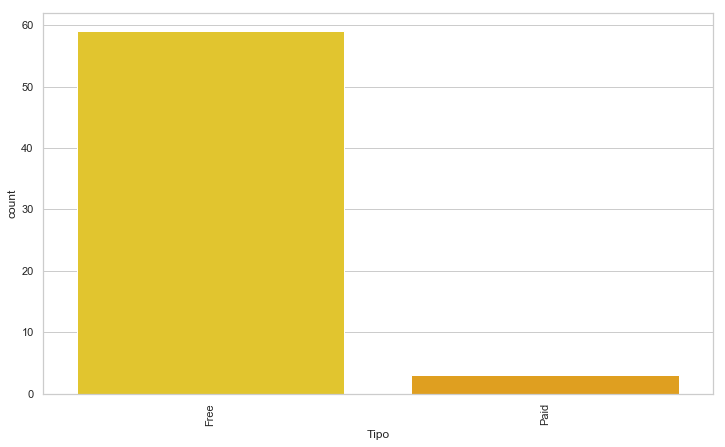

In [37]:
generalCountPlot('Tipo',df[df.Categoria == 'ART_AND_DESIGN'],"Wistia" )

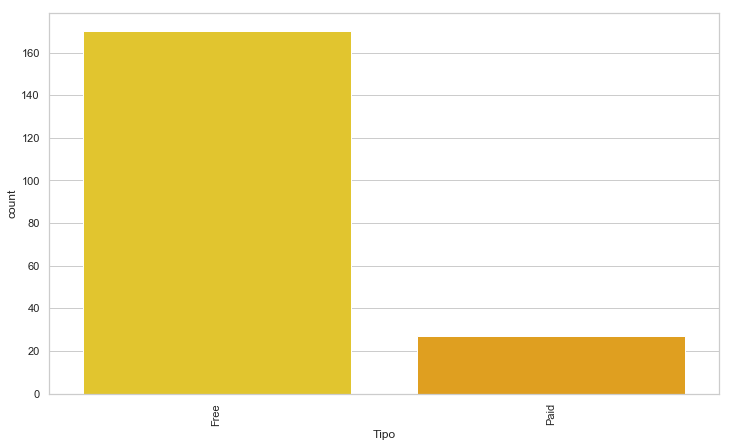

In [38]:
generalCountPlot('Tipo',df[df.Categoria == 'BOOKS_AND_REFERENCE'],"Wistia" )

In [39]:
df.head(2)

,App,Categoria,Puntaje,Reviews,Peso,Instalaciones,Tipo,Precio,Contenido,Genero,Actualizacion,Version,VersionAndroid,Peso_Bytes
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14336.0


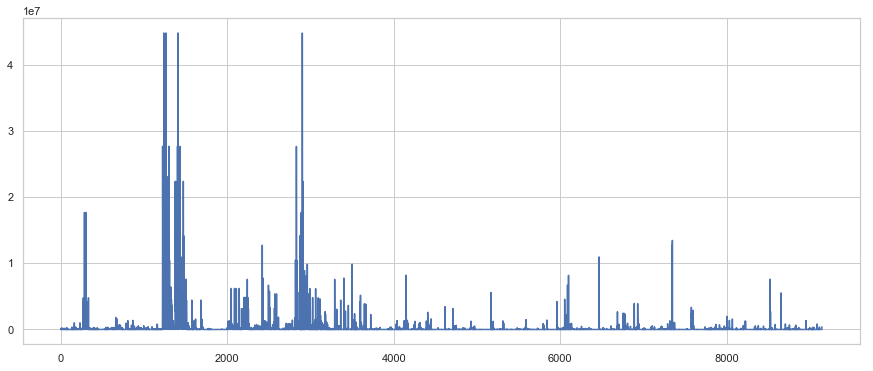

In [40]:
plt.figure(figsize=(15,6))
plt.plot(df['Reviews'])

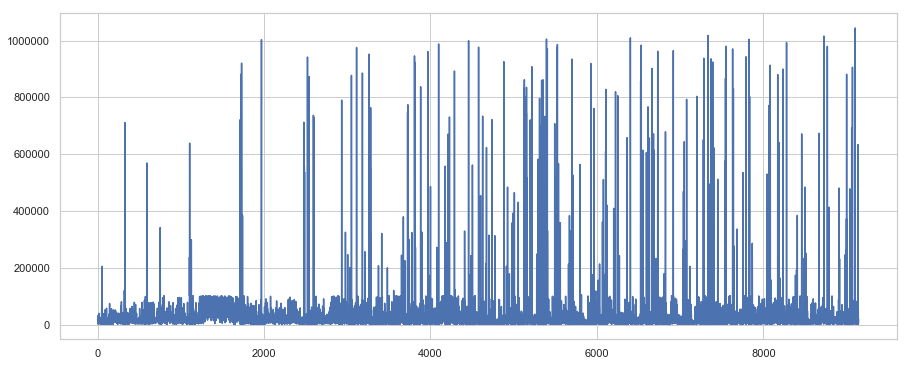

In [41]:
plt.figure(figsize=(15,6))
plt.plot(df['Peso_Bytes'])

In [42]:
contenido_x_grupo = df.groupby(['Contenido'])

In [43]:
def categoria_x_Contenido_apto(Tipo, color='rainbow'):    
    tipo = contenido_x_grupo.get_group(Tipo)['Tipo']
    plt.figure(figsize=(10,7))
    plt.xticks(rotation=90)
    sns.countplot(x=tipo, palette=color)

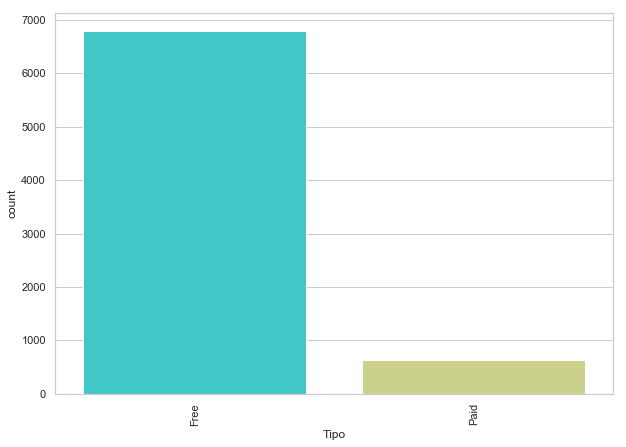

In [44]:
categoria_x_Contenido_apto('Everyone')

In [45]:
pd.unique(df['Contenido'])

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

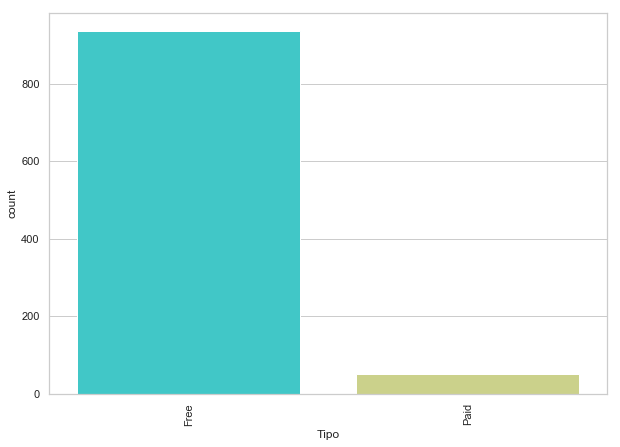

In [46]:
categoria_x_Contenido_apto('Teen')

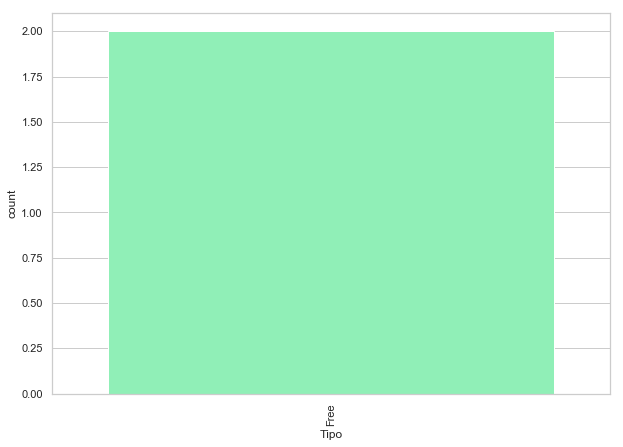

In [48]:
categoria_x_Contenido_apto('Adults only 18+')

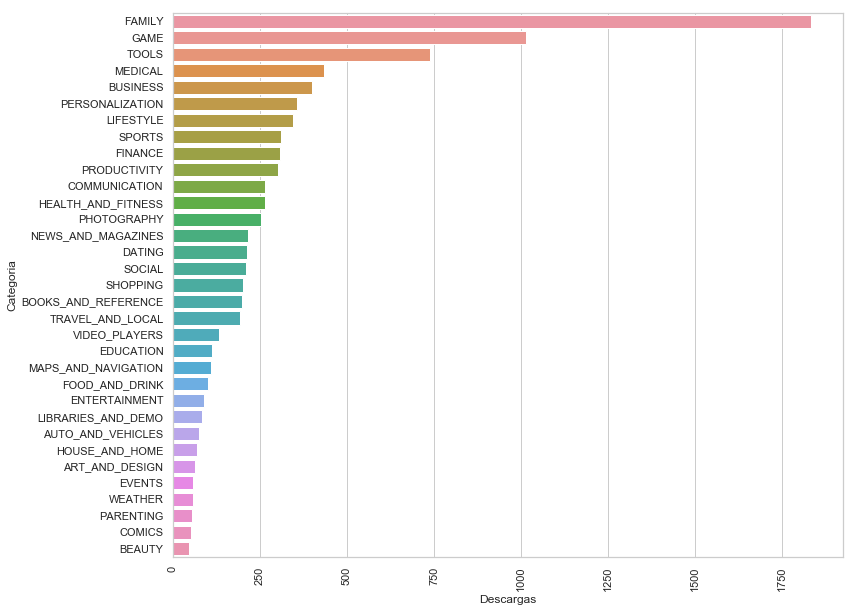

In [49]:
temp_res = df['Categoria'].value_counts()
categoria_x_descarga = pd.DataFrame({'Categoria':temp_res.index, 'Descargas':temp_res.tolist()})
plt.figure(figsize=(12, 10))
plt.xticks(rotation=90)
sns.barplot('Descargas','Categoria', data=categoria_x_descarga)